# Game Reviews Explorative EDA

This project focuses on analyzing and visualizing insights from the video game reviews dataset.

1. **Preparations**
    - Importing liberies
    - Loading dataset
    - Checking infos
2. **Data Clean up**
    - Checking for null-values
    - Checking for duplicates
3. **Analysing data distribution**
    - Distribution of numeric columns
    - Further Distribution of Game Length
    - **Exploration**: Do people like longer games more?
    - Further Distribution of Price
    - **Exploration**: Does the overall-quality of the game impact the price?
    - Price Correlations
4. **Feature Engineering**
    - Overall Quality
5. **Conclusion**

## 1. Preparations

### Importing liberies

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the dataset

In [32]:
df = pd.read_csv('../data/video_game_reviews.csv')

### Infos

In [33]:
print("First 5 lines:\n", df.head(5))
print("Last 5 lines:\n", df.tail(5))

First 5 lines:
            Game Title  User Rating Age Group Targeted  Price     Platform  \
0  Grand Theft Auto V         36.4           All Ages  41.41           PC   
1          The Sims 4         38.3             Adults  57.56           PC   
2           Minecraft         26.8              Teens  44.93           PC   
3   Bioshock Infinite         38.4           All Ages  48.29       Mobile   
4     Half-Life: Alyx         30.1             Adults  55.49  PlayStation   

  Requires Special Device   Developer        Publisher  Release Year  \
0                      No  Game Freak       Innersloth          2015   
1                      No    Nintendo  Electronic Arts          2015   
2                     Yes      Bungie           Capcom          2012   
3                     Yes  Game Freak         Nintendo          2015   
4                     Yes  Game Freak       Epic Games          2022   

       Genre Multiplayer  Game Length (Hours) Graphics Quality  \
0  Adventure          

In [34]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality   

In [35]:
print("\nShape:\n", df.shape)


Shape:
 (47774, 18)


In [36]:
print("\nColumns:\n", df.columns.to_list())


Columns:
 ['Game Title', 'User Rating', 'Age Group Targeted', 'Price', 'Platform', 'Requires Special Device', 'Developer', 'Publisher', 'Release Year', 'Genre', 'Multiplayer', 'Game Length (Hours)', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'User Review Text', 'Game Mode', 'Min Number of Players']


## 2. Data clean Up


In [42]:
missing_values = df.isnull().sum()
missing_values_p = df.isnull().mean() * 100

table = pd.DataFrame({
    'column': df.columns,
    'missing values': missing_values.values,
    'percentage': missing_values_p
})


print("Missing Values:\n", table)

Missing Values:
                                           column  missing values  percentage
Game Title                            Game Title               0         0.0
User Rating                          User Rating               0         0.0
Age Group Targeted            Age Group Targeted               0         0.0
Price                                      Price               0         0.0
Platform                                Platform               0         0.0
Requires Special Device  Requires Special Device               0         0.0
Developer                              Developer               0         0.0
Publisher                              Publisher               0         0.0
Release Year                        Release Year               0         0.0
Genre                                      Genre               0         0.0
Multiplayer                          Multiplayer               0         0.0
Game Length (Hours)          Game Length (Hours)           

-> No missing values

In [44]:
duplicate_values = df.duplicated().sum()
if duplicate_values != 0:
    print(duplicate_values)
else:
    print("No duplicates were found.")

No duplicates were found.


We have zero missing values and zero duplicates. The current datatypes are also fine.

## 3. Analysing data distribution

### Distribution and outliers of numerical columns

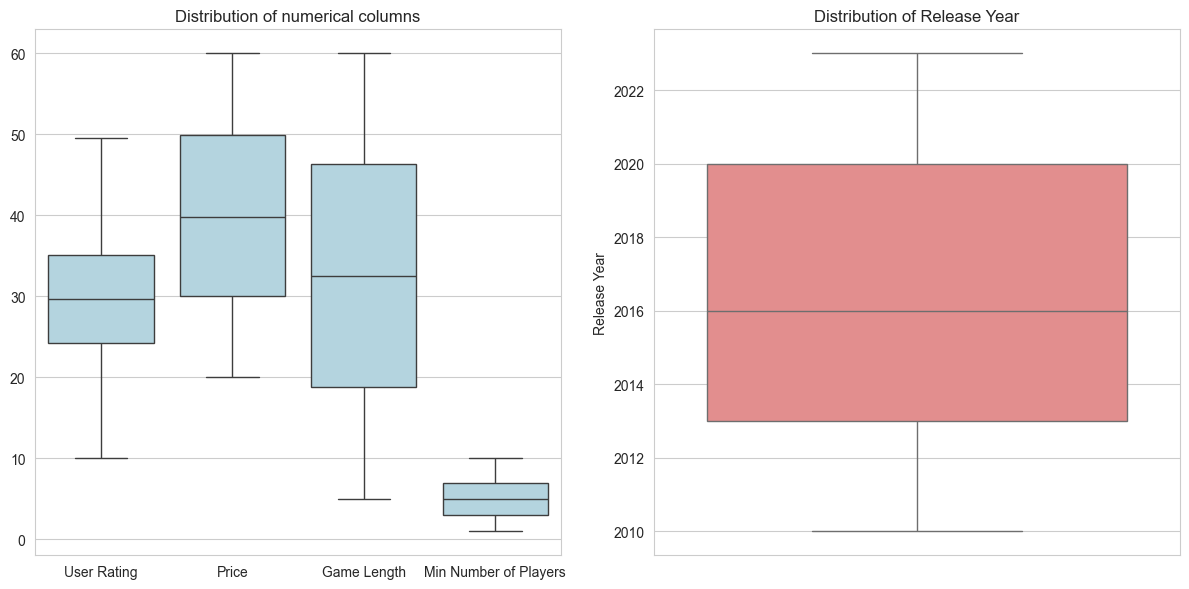

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_renamed = df.rename(columns={"Game Length (Hours)": "Game Length"})
df_cleaned = df_renamed.drop(columns=["Release Year"])

sns.boxplot(data=df_cleaned, color="lightblue", ax=axes[0])
axes[0].set_title("Distribution of numerical columns")

sns.boxplot(data=df, y="Release Year", color="lightcoral", ax=axes[1])
axes[1].set_title("Distribution of Release Year")

plt.tight_layout()
plt.show()

We can already see, that there are no real outliers. We still will be checking that with the IQR-method.

In [69]:
numeric_df = df.select_dtypes(include="number")

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) |
                (numeric_df > (Q3 + 1.5 * IQR)))

print("Count of outliers per column (IQR):")
print(outliers_iqr.sum())

Anzahl Ausreißer pro Spalte (IQR):
User Rating              0
Price                    0
Release Year             0
Game Length (Hours)      0
Min Number of Players    0
dtype: int64


### Further distribution of Game Lenght

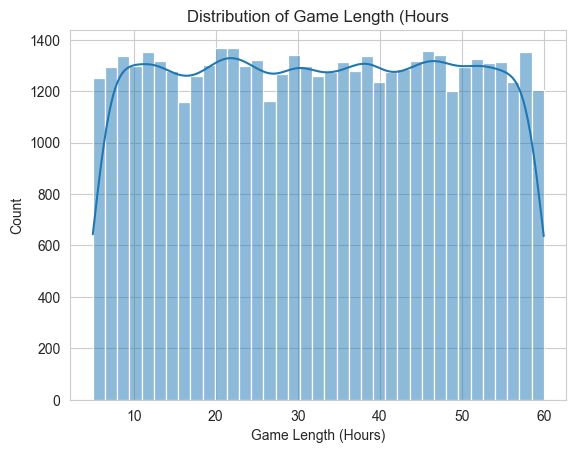

In [73]:
sns.histplot(data=df, x='Game Length (Hours)', kde=True)
plt.title("Distribution of Game Length (Hours")
plt.show()

This graph shows us, that the Game Lenght of the listed games are pretty evenly ditributed.
**Interesting stats:**

In [82]:
max_index = df['Game Length (Hours)'].idxmax()
print("Max Value:", df['Game Length (Hours)'].max(),
      "\nGame title:", df.loc[max_index, 'Game Title'])

min_index = df['Game Length (Hours)'].idxmin()
print("\nMin Value: ", df['Game Length (Hours)'].min(),
      "\nGame title:", df.loc[min_index, 'Game Title'])

Max Value: 60.0 
Title: The Witcher 3: Wild Hunt

Min Value:  5.0 
Title: Street Fighter V


### Exploration: Do people like longer games more?

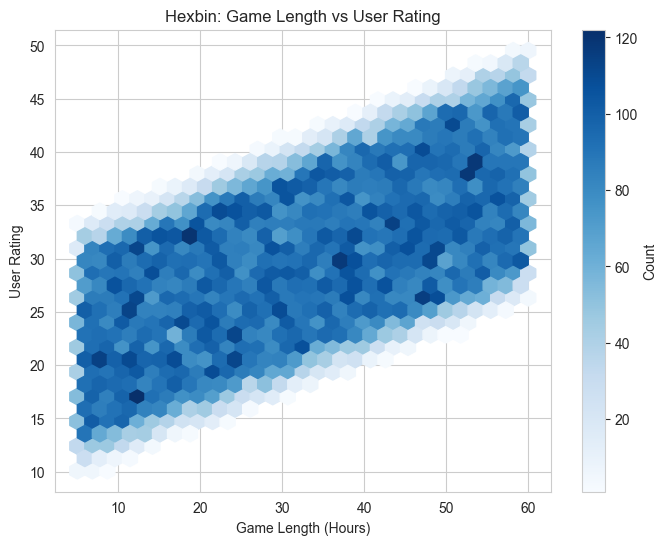

In [95]:
plt.figure(figsize=(8,6))
plt.hexbin(df['Game Length (Hours)'], df['User Rating'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel("Game Length (Hours)")
plt.ylabel("User Rating")
plt.title("Hexbin: Game Length vs User Rating")
plt.show()

The plot above shows that the longer the games are, the better the raiting is. Let's check by looking at the **average user rating** grouped by the **game length**.

In [105]:
avg_ratings = df.groupby('Game Length (Hours)')['User Rating'].mean().reset_index()
avg_ratings.rename(columns={'User Rating': 'Average User Rating'}, inplace=True)
print(avg_ratings)

     Game Length (Hours)  Average User Rating
0                    5.0            21.070455
1                    5.1            20.686869
2                    5.2            22.381928
3                    5.3            21.173494
4                    5.4            20.929268
..                   ...                  ...
546                 59.6            38.249412
547                 59.7            37.507368
548                 59.8            38.000000
549                 59.9            38.003571
550                 60.0            38.719048

[551 rows x 2 columns]


We can clearly see, that the games with a longer play time usally have a better user rating

### Further distribution of price

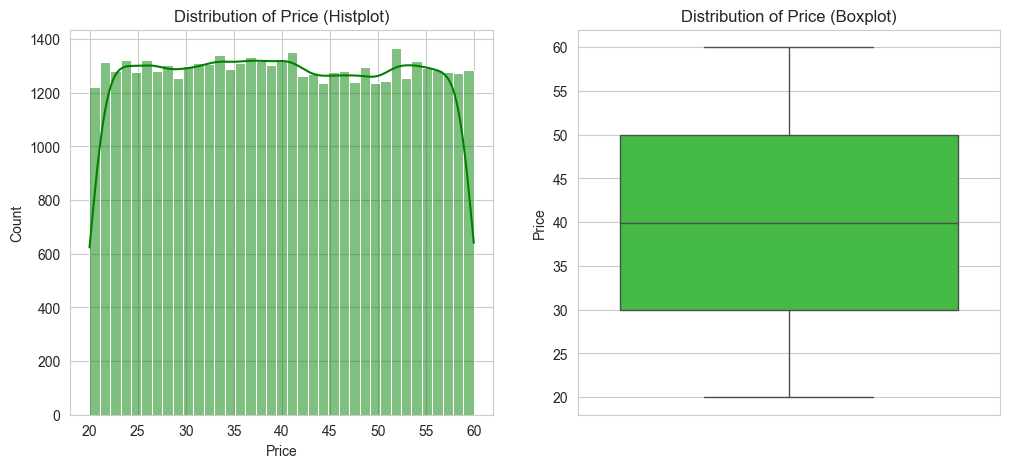

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.histplot(data=df, x='Price', kde=True, color='green',  ax=axes[0])
sns.boxplot(data=df, y='Price', ax=axes[1], color='limegreen')

axes[0].set_title("Distribution of Price (Histplot)")
axes[1].set_title("Distribution of Price (Boxplot)")
plt.show()

We can see, that the prices are distributed evenly. Let's investigate further.

In [122]:
print("Average Price:", round(df['Price'].mean(), 2), "$")

max_index = df['Price'].idxmax()
print("\nMax Value:", df['Price'].max(),"$",
      "\nGame title:", df.loc[max_index, 'Game Title'])

min_index = df['Price'].idxmin()
print("\nLowest Price: ", df['Price'].min(), "$",
      "\nGame: ", df.loc[min_index, 'Game Title'])


Average Price: 39.95 $

Max Value: 59.99 $ 
Game title: Counter-Strike: Global Offensive

Lowest Price:  19.99 $ 
Game:  Super Smash Bros. Ultimate


### Exploration: Does the overall-quality of the game impact the price?

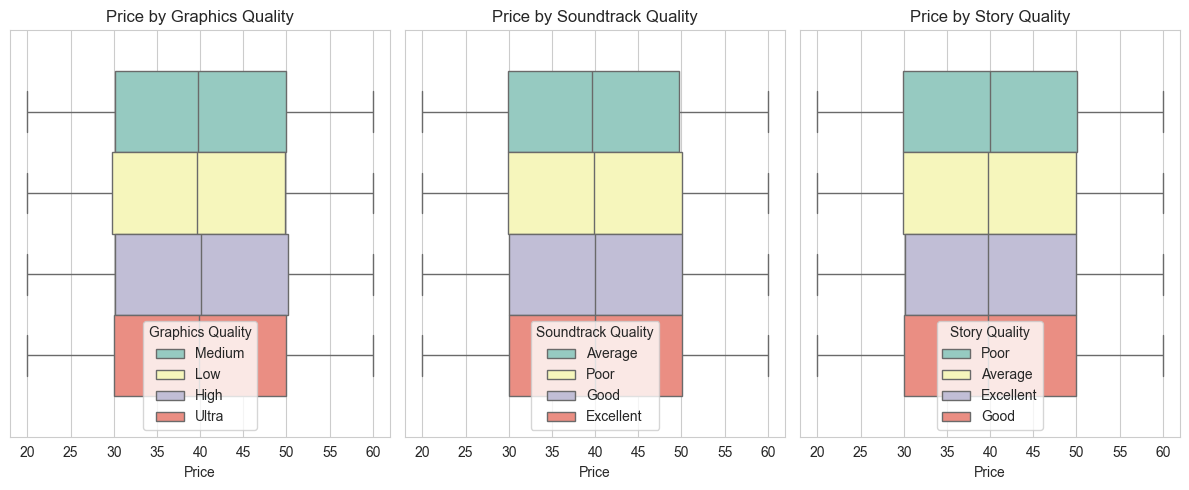

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

sns.boxplot(data=df, x='Price',hue='Graphics Quality', palette='Set3', ax=axes[0])
sns.boxplot(data=df, x='Price',hue='Soundtrack Quality', palette='Set3', ax=axes[1])
sns.boxplot(data=df, x='Price',hue='Story Quality', palette='Set3', ax=axes[2])
axes[0].set_title("Price by Graphics Quality")
axes[1].set_title("Price by Soundtrack Quality")
axes[2].set_title("Price by Story Quality")

plt.tight_layout()
plt.show()

The quality has some influence on the price, but:

- The influence is not very strong.
- There is significant overlap between the price ranges of different quality levels.
- There is no clear linear relationship observable.

### Price Correlations

Let's investigate further by checking the numeric correlation with the price.

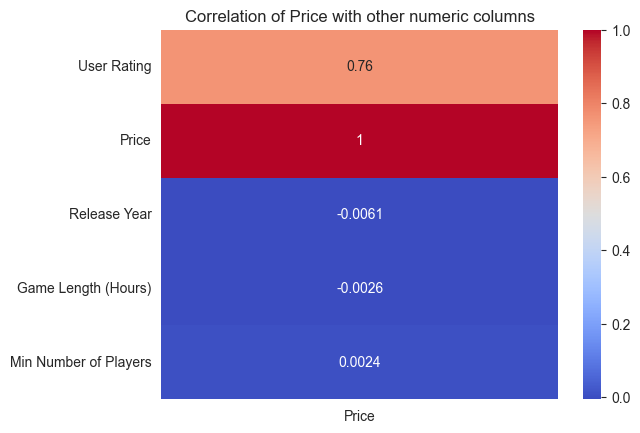

In [168]:
numeric_df = df.select_dtypes(include='number')
corr_price = numeric_df.corr(method='spearman')[['Price']]

sns.heatmap(data=corr_price, annot=True, cmap='coolwarm')
plt.title("Correlation of Price with other numeric columns")
plt.show()

There seems to be some relationship between the price and user rating.

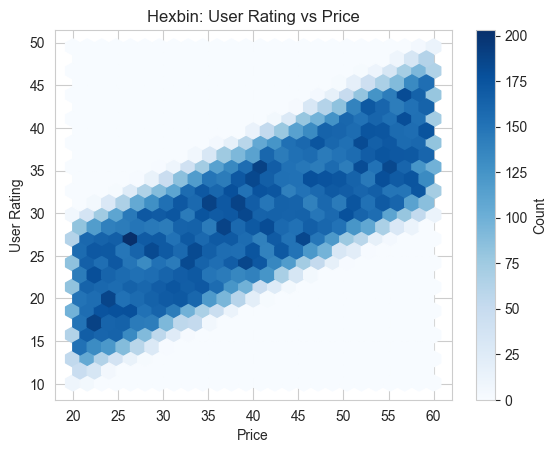

In [173]:
plt.hexbin(df['Price'], df['User Rating'], gridsize=25, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.title("Hexbin: User Rating vs Price")
plt.show()

We can clearly see that the higher the User Rating the higher the price.

## 4. Feature Engineering

### Overall Quality
To understand and use the game quality categories such as Soundtrack, graphics and story quality, we create a new one, that represents the overall quality of the game.

In [182]:
quality_mapping = {'Low':1, 'Medium':2, 'Good':3, 'Excellent':4}

df['Overall Quality'] = df[['Graphics Quality', 'Soundtrack Quality', 'Story Quality']].apply(lambda col: col.map(quality_mapping)).mean(axis=1)

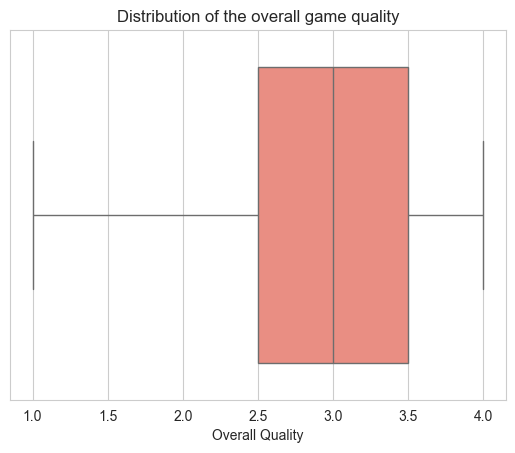

In [189]:
sns.boxplot(data=df, x='Overall Quality', color='salmon')
plt.title("Distribution of the overall game quality")
plt.show()

## 5. Conclusion

This exploratory data analysis provided insights into how game length, quality, and other factors relate to user ratings and prices. The findings can be used as a basis for predictive modeling or further in-depth analysis